<a href="https://colab.research.google.com/github/YuraLi88/hello-world-/blob/readme-edits/gas2DonPlate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
# import altair as alt
import numpy as np 
import matplotlib.pyplot as plt
from math import pi
from plot_utils import sew_phase
cl = 3e10
%load_ext autoreload
%autoreload 2
# mpl.style.use('seaborn')
%config InlineBackend.figure_formats = ['svg']

## 2D-газ на підкладці

Вирази для амплітудних коефіцієнтів відбивання і пропускання через параметри 2D-газу і відповідні коефіцієнти підкладки

$$r_{full} = \frac{r_p(\omega+i\gamma)-i\Gamma}{\omega+i(\gamma+\Gamma)}$$

$$t_{full} = t_p\frac{\omega+i\gamma}{\omega+i(\gamma+\Gamma)}$$

де $\Gamma = \frac{2\pi e^2 n^{2D}}{m^{*} c \sqrt{\varepsilon_0} }(1+r_p)$ і $\gamma=1/\tau$, $t_p$, $r_p$ --- комплексні коефіцієнти пропускання і відбивання підкладки
[Section2](#label1) 

In [ ]:
from simple_structures import gas_on_plate, plate, gas2D
from plot_utils import plot_T_phi, plot_R_phi

 7.95e+11
 2.65e+11
ri = 0.0
 1.90e+12


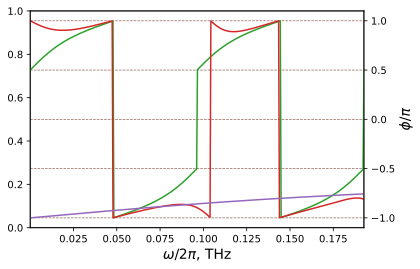

In [ ]:
Plate = plate(Dmkm=500, eps1=9.7, eps0=1)
Gas = gas_on_plate(Gamma= 1e12, gamma=1e12, plate = Plate, meff = 0.2)
OnlyGas = gas2D(Gamma= 1e12, gamma=1e12, meff = 0.2, eps1=1)
OnlyGas.n2D = 1e12
Gas.n2D = 3e12
print(f'{Gas.Gamma: 8.2e}')
print(f'{OnlyGas.Gamma: 8.2e}')
print(f'ri = {OnlyGas.r_i}')
sew = False
# v = np.linspace(0.0,2e11,100000)
Psi = np.linspace(0.001,2*np.pi+0.001,400)
# w= 2*pi*v
w = Psi/Plate.k
v = w/(2*pi)
Psi0 = w/cl*Plate.Dcm
print(f'{w.max()/2*np.pi: 8.2e}')
R_plate = np.abs(Plate.r_w(w))**2
R_gas = np.abs(Gas.r_w(w))**2
r_plate = Plate.r_w(w)
r_gas = Gas.r_w(w)
fi1 = Plate.r_phase(w)
fi2 = Gas.r_phase(w)
fi3 = np.angle(Gas.t_w(w))
fi4 = np.angle(Plate.t_w(w))
fi_gas = np.angle(OnlyGas.r_w(w))/pi
fig,ax0 = plt.subplots()
ax1 = ax0.twinx()
vTHz = v*1e-12

# fi /= pi
# sew = True
if sew:
    fi1, fi2, fi3, fi4 = [sew_phase(fi/pi) for fi in (fi1,fi2, fi3, fi4)]
else:
    fi1, fi2, fi3, fi4 = [fi/pi for fi in (fi1,fi2, fi3, fi4)]
# ax0.plot(vTHz, x,'C2-', label=label_y1,zorder=3)

ax1.plot(vTHz,fi1,'C2-', label = r"$\phi/\pi, plate$",zorder=4)
ax1.plot(vTHz,fi2,'C3-', label = r"$\phi/\pi$, gas on plate",zorder=4)
ax1.plot(vTHz,fi_gas,'C4-', label = r"$\phi/\pi$, only gas ",zorder=4)

# ax1.plot(vTHz,fi3,'C4-', label = r"$\phi_t/\pi$, gas on plate",zorder=4)
# ax1.plot(vTHz,fi4,'C5-', label = r"$\phi_t/\pi$, only plate",zorder=4)
# ax1.plot(vTHz, fi_gas)
steps = np.arange(-1,1.5,0.5)
[ax1.axhline(step,lw=0.7,ls='--',c='C5', zorder=1) for step in steps]
ax0.set_xlim((vTHz[0],vTHz[-1]))
ax1.set_yticks(steps)
ax0.set_zorder(2)
ax0.patch.set_visible(False)  
ax0.set_xlabel(r'$\omega/2\pi$, THz',fontdict={'fontsize':14})
# ax0.set_ylabel(label_y1,fontdict={'fontsize':14})
ax1.set_ylabel(r'$\phi/\pi$',fontdict={'fontsize':14})
plt.show()
# np.savetxt('data_files/plate_Rer_Imr.dat',np.c_[np.real(r_plate),np.imag(r_plate)])
# np.savetxt('data_files/plate_Gas_Rer_Imr.dat',np.c_[np.real(r_gas),np.imag(r_gas)])
np.savetxt('data_files/plate_r_phase.dat',np.c_[Psi,fi1])
np.savetxt('data_files/plateGas_r_phase.dat',np.c_[Psi,fi2])

# np.savetxt('data_files/plate_r_phase_unw.dat',np.c_[Psi,fi1])
np.savetxt('data_files/plateGas_r_phase_unw.dat',np.c_[Psi,sew_phase(fi2)])

np.savetxt('data_files/plate_R.dat',np.c_[Psi,R_plate])
np.savetxt('data_files/plateGas_R.dat',np.c_[Psi,R_gas])

In [ ]:
def find_all_extrema(r):
    extrema = []
    phi = np.angle(r)
    for i in range(1,len(r)-1):
        if np.abs(np.abs(phi[i])-np.pi)>0.05:
            if (phi[i-1]<phi[i]) and (phi[i]>phi[i+1]):

                extrema.append([np.real(r[i]), np.imag(r[i])])
            if phi[i-1]>phi[i]<phi[i+1]:
                extrema.append([np.real(r[i]), np.imag(r[i])])
    return np.array(extrema)
extr = find_all_extrema(r_gas)
print(extr)
# plt.plot(np.angle(r_gas))
# plt.plot(np.angle(extr[:,0]+1j*extr[:,1]))
np.savetxt('data_files/extrema_points1.dat',extr)

[[-0.57532796  0.17989977]
 [-0.5037951  -0.23102823]
 [-0.51478018  0.18643308]
 [-0.36600549 -0.26871658]]


<a id = 'label1'></a>
<!--referenced section-->
### Section 2


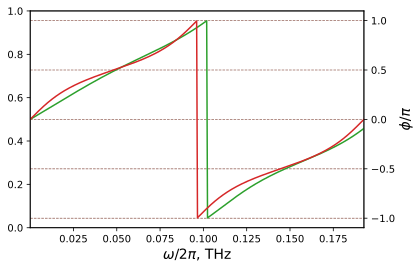

In [ ]:
T_gas = np.abs(Gas.t_w(w))**2
T_plate = np.abs(Plate.t_w(w))**2
fi1 = Plate.r_phase(w)
fi2 = Gas.r_phase(w)
fi3 = np.angle(Gas.t_w(w))
fi4 = np.angle(Plate.t_w(w))
fig,ax0 = plt.subplots()
ax1 = ax0.twinx()
vTHz = v*1e-12

# fi /= pi
sew=False
if sew:
    fi1, fi2, fi3, fi4 = [sew_phase(fi/pi) for fi in (fi1,fi2, fi3, fi4)]
else:
    fi1, fi2, fi3, fi4 = [fi/pi for fi in (fi1,fi2, fi3, fi4)]
# ax0.plot(vTHz, x,'C2-', label=label_y1,zorder=3)
#ax1.plot(vTHz,fi1,'C2-', label = r"$\phi/\pi, plate$",zorder=4)
#ax1.plot(vTHz,fi2,'C3-', label = r"$\phi/\pi$, gas on plate",zorder=4)
ax1.plot(vTHz,fi3,'C2-', label = r"$\phi_t/\pi$, gas on plate",zorder=4)
ax1.plot(vTHz,fi4,'C3-', label = r"$\phi_t/\pi$, only plate",zorder=4)
steps = np.arange(-1,1.5,0.5)
[ax1.axhline(step,lw=0.7,ls='--',c='C5', zorder=1) for step in steps]
ax0.set_xlim((vTHz[0],vTHz[-1]))
ax1.set_yticks(steps)
ax0.set_zorder(2)
ax0.patch.set_visible(False)  
ax0.set_xlabel(r'$\omega/2\pi$, THz',fontdict={'fontsize':14})
# ax0.set_ylabel(label_y1,fontdict={'fontsize':14})
ax1.set_ylabel(r'$\phi/\pi$',fontdict={'fontsize':14})
plt.show()
np.savetxt('data_files/plate_t_phase_sew.dat',np.c_[Psi,sew_phase(fi4)-Psi0/pi])
np.savetxt('data_files/plateGas_t_phase.dat',np.c_[Psi,fi3-Psi0/pi])
np.savetxt('data_files/plateGas_t_phase_sew.dat',np.c_[Psi,sew_phase(fi3)-Psi0/pi])
np.savetxt('data_files/plateGas_T.dat',np.c_[Psi,T_gas])
np.savetxt('data_files/plate_T.dat',np.c_[Psi,T_plate])

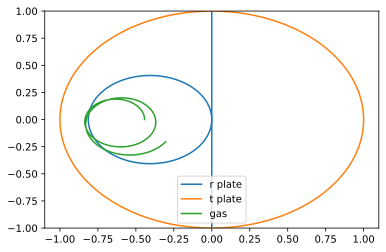

In [ ]:
r_plate = Plate.r_w(w)
t_plate = Plate.t_w(w)
t_plate = t_plate/np.abs(t_plate)
r_gas = Gas.r_w(w)
# Gas.n2D = 0

plt.plot(np.real(r_plate), np.imag(r_plate), label = 'r plate')
plt.plot(np.real(t_plate), np.imag(t_plate), label = 't plate')
plt.plot(np.real(r_gas), np.imag(r_gas), label = 'gas')
plt.vlines(0,-1,1)
plt.ylim((-1,1))
plt.legend()
plt.show()

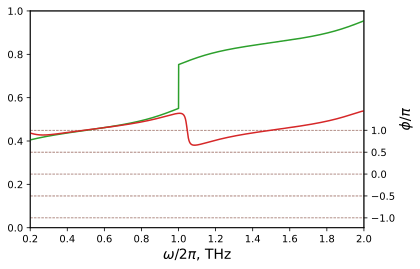

In [ ]:
Gas.n2D = 5e12
sew = True
v = np.linspace(0.2e12,2e12,10000)
w= 2*pi*v
fi1 = Plate.r_phase(w)
fi2 = Gas.r_phase(w)
fig,ax0 = plt.subplots()
ax1 = ax0.twinx()
vTHz = v*1e-12
# fi /= pi
if sew:
    fi1, fi2 = [sew_phase(fi/pi) for fi in (fi1,fi2)]
else:
    fi1, fi2 = [fi/pi for fi in (fi1,fi2)]
# ax0.plot(vTHz, x,'C2-', label=label_y1,zorder=3)
ax1.plot(vTHz,fi1,'C2-', label = r"$\phi/\pi, plate$",zorder=4)
ax1.plot(vTHz,fi2,'C3-', label = r"$\phi/\pi$, gas on plate",zorder=4)
steps = np.arange(-1,1.5,0.5)
[ax1.axhline(step,lw=0.7,ls='--',c='C5', zorder=1) for step in steps]
ax0.set_xlim((vTHz[0],vTHz[-1]))
ax1.set_yticks(steps)
ax0.set_zorder(2)
ax0.patch.set_visible(False)  
ax0.set_xlabel(r'$\omega/2\pi$, THz',fontdict={'fontsize':14})
# ax0.set_ylabel(label_y1,fontdict={'fontsize':14})
ax1.set_ylabel(r'$\phi/\pi$',fontdict={'fontsize':14})
plt.show()

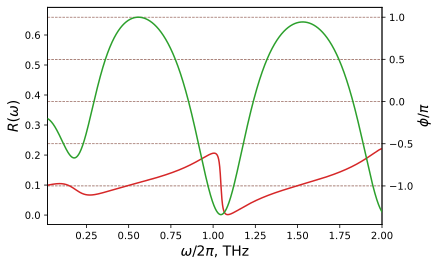

In [ ]:
plot_R_phi(Gas, sew=True )

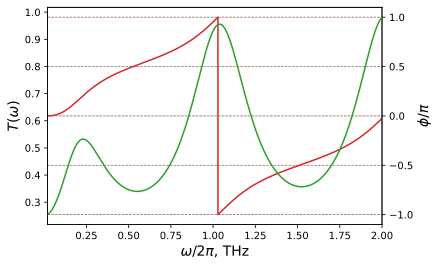

In [ ]:
plot_T_phi(Gas)

In [ ]:
from plot_utils import plot_multiple

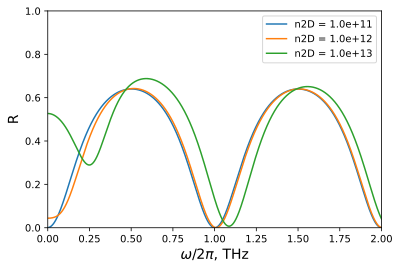

In [ ]:
plot_multiple(Gas, 'R', 'n2D', [1e11,1e12,1e13] )

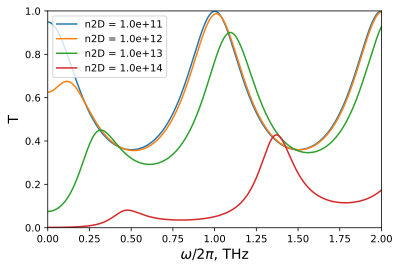

In [ ]:
plot_multiple(Gas, 'T', 'n2D', [1e11,1e12,1e13, 1e14] )

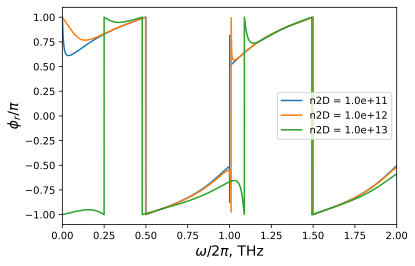

In [ ]:
plot_multiple(Gas, 'phi_r', 'n2D', [1e11,1e12,1e13] )

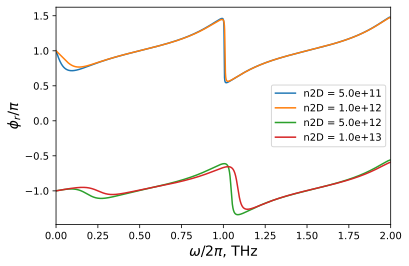

In [ ]:
plot_multiple(Gas, 'phi_r', 'n2D', [5e11,1e12,5e12,1e13],sew = True)

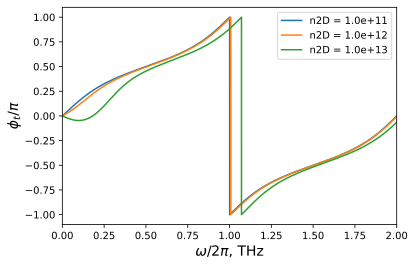

In [ ]:
plot_multiple(Gas, 'phi_t', 'n2D', [1e11,1e12,1e13] )

In [ ]:
Gas = gas_on_plate(Gamma= 1e12, gamma=1e11, plate = Plate, meff = 0.2)